### Applying Inferential statistics 
<img src='http://www.statisticaldataanalysis.net/wp-content/uploads/2015/03/inferential-statistical-analysis-300x180.jpg'>
#### To check which is the most ordered food type in all restaurants


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats

In [3]:
data = pd.read_csv('.//Data//Train_data.csv')
data[['air_genre_name','visitors']].head(2)

,air_genre_name,visitors
0,Dining bar,25
1,Dining bar,32


In [4]:
print("Unique genre/food type in restaturants :")
data[data['air_genre_name'] != -1]['air_genre_name'].unique()

Unique genre/food type in restaturants :


array(['Dining bar', 'Izakaya', 'Cafe/Sweets', '-1', 'Bar/Cocktail',
       'Italian/French', 'Okonomiyaki/Monja/Teppanyaki', 'Other',
       'International cuisine', 'Japanese food', 'Yakiniku/Korean food',
       'Karaoke/Party', 'Western food', 'Creative cuisine', 'Asian'], dtype=object)

### 1.) Analyzing visitor's most favorite food. Is it Izakaya or other ?
##### From the EDA analysis,it has been shown that most of the visitors are ordering 'Izakaya' food than the others
[Check_Here](https://github.com/nishalpattan/SPRINGBOARD/blob/master/Capstone_Project/Data_StoryTelling_EDA.ipynb)

#### Forming Hypothesis
#### Null Hypothesis : $H_{0}$ : Average number of visitors ordering Izakaya food is equal to average number of visitors ordering Other food types $\mu_{1}$ = $\mu_{2}$ <br> Alternante Hypothesis : $H_{A}$ :  Average number of visitors ordering Izakaya food is greater than the average number of visitors ordering Other food types$\mu_{1}$ !=  $\mu_{2}$ <br> The threshold value of $\alpha$ is assumed to be 0.05. Assuming Null Hypothesis is true.

In [5]:
df_izakaya = data[data['air_genre_name'] == 'Izakaya']['visitors']
df_other = data[data['air_genre_name'] != 'Izakaya']['visitors']

In [6]:
print("Number of samples in df_izakaya : ",df_izakaya.shape)
print("Number of samples in df_other : ",df_other.shape)
izakaya_mean_visitors = df_izakaya.mean()
other_mean_visitors = df_other.mean()
izakaya_std = df_izakaya.std()
other_std = df_other.std()
print("Mean visitor count ordering Izakaya : ",izakaya_mean_visitors)
print("Mean visitor count ordering other than Izakaya : ",other_mean_visitors)
print("Standard deviation in Izakaya data: ",izakaya_std)
print("Standard deviation in other than Izakaya data: ",other_std)
print("Ratio of standard deviations : ",other_std/izakaya_std)

Number of samples in df_izakaya :  (61764,)
Number of samples in df_other :  (190344,)
Mean visitor count ordering Izakaya :  23.083624765235413
Mean visitor count ordering other than Izakaya :  20.289139662926072
Standard deviation in Izakaya data:  17.020993369246032
Standard deviation in other than Izakaya data:  16.613013222366938
Ratio of standard deviations :  0.9760307675334483


#### The standard deviation of both are nearly close/equal. this can be seen using the ratio between them which is ~ 0.97

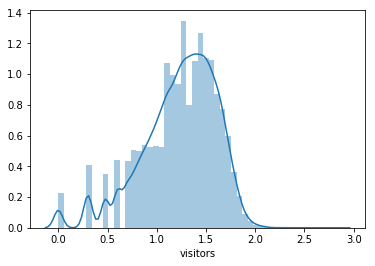

In [7]:
sns.distplot(np.log10(df_izakaya)) #taking log scale to get clear view of ditribution

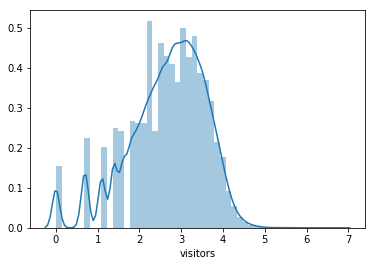

In [8]:
sns.distplot(np.log(df_other)) #taking log scale to get clear view of ditribution

In [9]:
h0_mean = 0 #from null hypothesis the mean would be 0
mean_diff = izakaya_mean_visitors - other_mean_visitors
sigma_diff = izakaya_std - other_std
mean_diff, sigma_diff

(2.7944851023093413, 0.407980146879094)

#### Using student's t-statistic(Pooled variances) as the variance of population is unknown
#### First find the common standard deviation ($s_{p}$)that can be estimated by the pooled standard deviation

In [10]:
df = len(df_other) - len(df_izakaya)  + 2 #degree of freedom
sp = np.sqrt( ( ( len(df_izakaya) - 1 ) * (izakaya_std ** 2 ) + ( len(df_other) - 1 ) * (other_std ** 2 ) ) / df ) # common standard deviation
t = (mean_diff - h0_mean) / (sp * ( np.sqrt((1/len(df_izakaya))+(1/len(df_other)))) ) #t-statistic
print("Degrees of Freedom : ",df)
print("Common Standard Deviation : ",sp)
print("t-statistic : ",t)

Degrees of Freedom :  128582
Common Standard Deviation :  23.4033971111
t-statistic :  25.7849851865


In [11]:
p_Val = 1 - stats.t.cdf(t,df=df)
print("P-Value : ",p_Val)

P-Value :  0.0


<b> From the p-value, it is evident that mean number of customers eating Izakaya food is statistically significant.

In [12]:
t, p = stats.ttest_ind(df_izakaya,df_other) # cross-checking
p 

1.0145574677365108e-284